In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [63]:
path = kagglehub.dataset_download("iamsouravbanerjee/world-population-dataset")

In [64]:
df = pd.read_csv(f'{path}/data.csv')

In [65]:
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [66]:
def polynomial_extrapolation(df, x_future, degree=2, calculate_error=False):
    results = []
    years = [1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022]

    for index, row in df.iterrows():
        population_data = [row['1970 Population'], row['1980 Population'], row['1990 Population'], 
                           row['2000 Population'], row['2010 Population'], row['2015 Population'], 
                           row['2020 Population'], row['2022 Population']]
        
        coefficients = np.polyfit(years, population_data, degree)
        extrapolated_population = np.polyval(coefficients, x_future)

        result = {
            'Country/Territory': row['Country/Territory'],
            'Extrapolated Population': extrapolated_population
        }

        # If we're testing the model on a known year like 2022, calculate error
        if calculate_error and str(x_future) + ' Population' in row:
            actual = row[str(x_future) + ' Population']
            result['Actual Population'] = actual
            result['Absolute Error'] = abs(extrapolated_population - actual)
            result['Percentage Error'] = abs(extrapolated_population - actual) / actual * 100

        results.append(result)

    return pd.DataFrame(results)

  Country/Territory  Extrapolated Population
0       Afghanistan             4.461622e+07
1           Albania             2.639398e+06
2           Algeria             4.586316e+07
3    American Samoa             4.330158e+04
4           Andorra             7.844615e+04


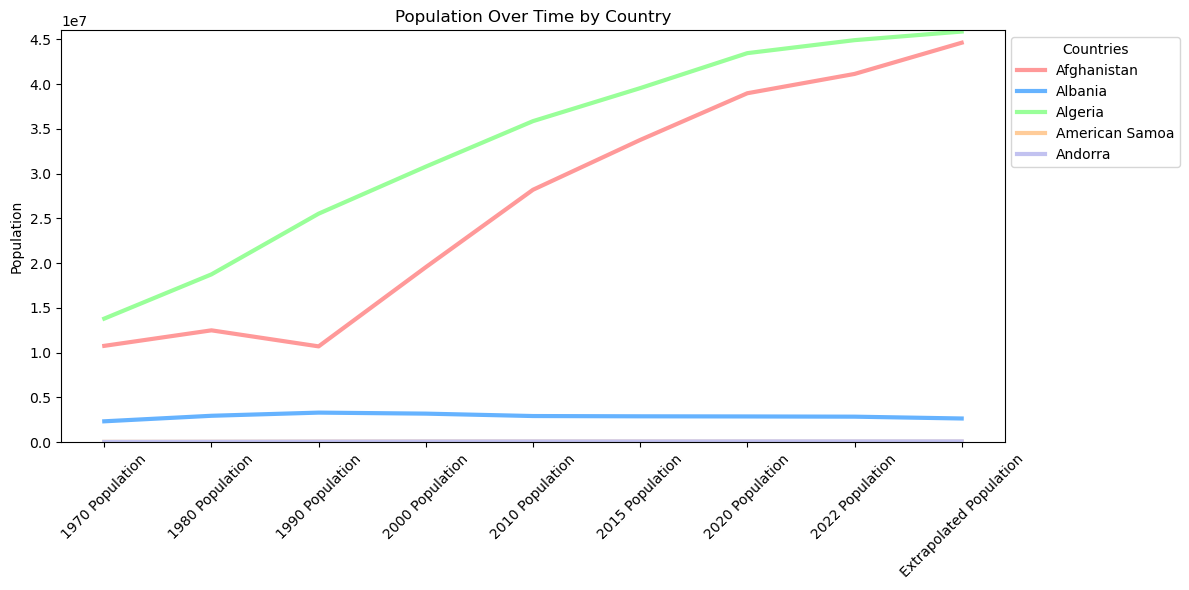

In [67]:
test_year = int(input('Enter year: '))

y_base = df[['1970 Population', '1980 Population', '1990 Population', 
             '2000 Population', '2010 Population', '2015 Population', 
             '2020 Population', '2022 Population']].head(5)

extrapolated = polynomial_extrapolation(df, test_year).head(5)[['Extrapolated Population']]

y = pd.concat([y_base, extrapolated], axis=1)

print(polynomial_extrapolation(df, test_year).head(5))

countries = polynomial_extrapolation(df, test_year).head(5)['Country/Territory'].tolist()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'] 

x = np.arange(len(y.columns))

labels = y.columns 

y_numeric = y.apply(pd.to_numeric, errors='coerce')

fig, ax = plt.subplots(figsize=(12, 6))

for i, country in enumerate(countries):
    ax.plot(x, y_numeric.iloc[i], label=country, color=colors[i], linewidth=3) 

y_min = y_numeric.min().min() 
y_max = y_numeric.max().max() 

tick_start = int(np.floor(y_min / 1_000_000) * 1_000_000)
tick_end = int(np.ceil(y_max / 1_000_000) * 1_000_000)

y_ticks = np.arange(tick_start, tick_end + 1, 5_000_000)

fig.patch.set_alpha(0.1) 

ax.set(
    xticks=x,
    xticklabels=labels,
    yticks=y_ticks,
    ylabel='Population',
    ylim=(tick_start, tick_end), 
    title='Population Over Time by Country'
)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Countries")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

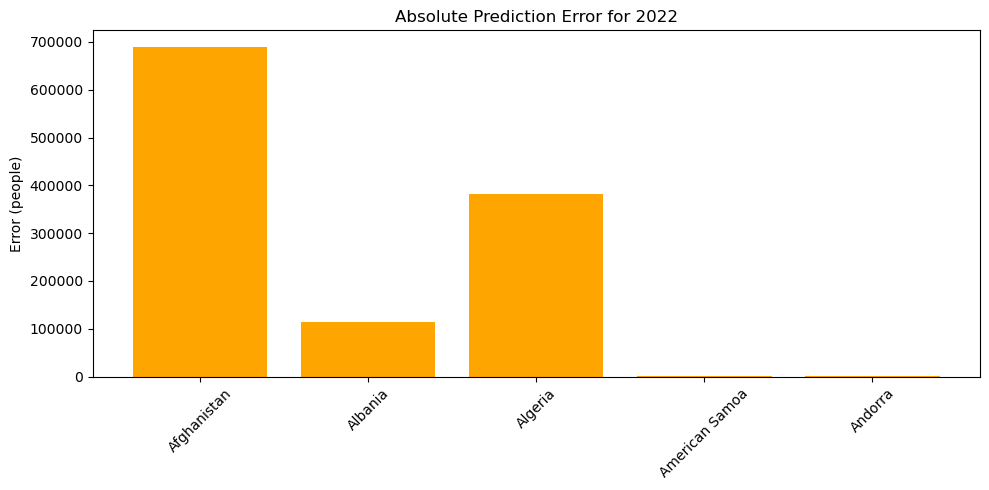

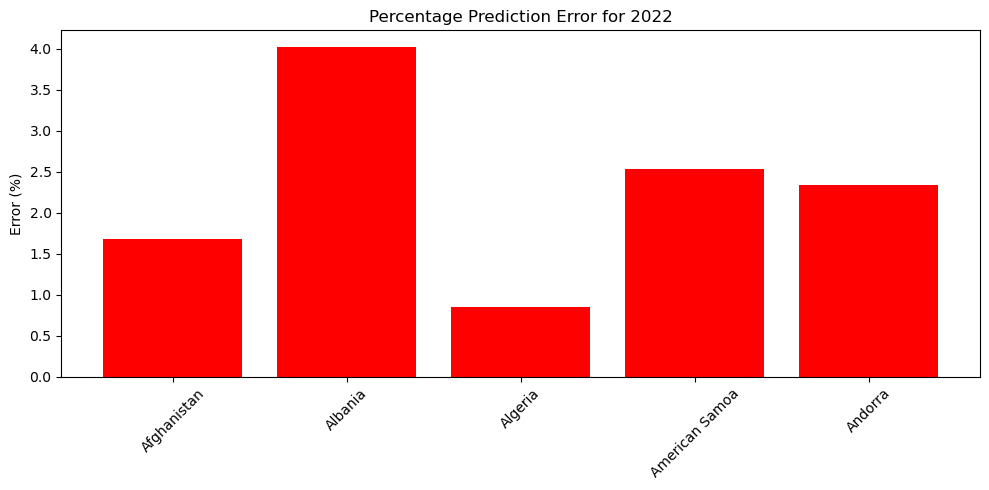

In [71]:
# Calculate error on a known year (e.g., 2022)
error_df = polynomial_extrapolation(df, 2022, degree=2, calculate_error=True).head(5)

# Plot absolute error
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(error_df['Country/Territory'], error_df['Absolute Error'], color='orange')
ax.set_title('Absolute Prediction Error for 2022')
ax.set_ylabel('Error (people)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot percentage error
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(error_df['Country/Territory'], error_df['Percentage Error'], color='red')
ax.set_title('Percentage Prediction Error for 2022')
ax.set_ylabel('Error (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()